#  NLP Classification Project: CleanWatAI


##  Project Overview

The CleanWatAI project aims to classify water-related news excerpts using Natural Language Processing (NLP) techniques. 
By leveraging both structured and unstructured data, our objective is to detect early signs of water contamination, supply risk, and infrastructure vulnerability in different regions.

This notebook follows a structured data science workflow inspired by the CRISP-DM methodology, enriched with textual insights from NLP feature engineering and model optimization. 

**Project Goals:**
- Clean and explore the dataset (both structured and textual).
- Engineer meaningful features, especially from text.
- Apply various NLP models to classify excerpts based on contamination risk.
- Evaluate and interpret model performance with emphasis on explainability.


## Data Loading and Initial Exploration



In this section, we will:
- Load the dataset
- Display basic structure and size
- Check column types and missing values


In [229]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/raw/water_sanitation_cleaned.csv')
df.head()

country                             source_title  \
0     Haiti  Aid Workers Warn of Contamination Risks   
1  Ethiopia    Red Cross Reports Severe Water Crisis   
2     Nepal    Red Cross Reports Severe Water Crisis   
3     India        Outbreak Sparks Sanitation Review   
4     Kenya        Outbreak Sparks Sanitation Review   

                                             excerpt  geo_location  \
0  Contaminated water sources have led to increas...      5.937200   
1  Field reports indicate raw sewage mixes with l...     34.615215   
2  No treatment observed; water smells foul and r...    -68.387244   
3  Contaminated water sources have led to increas...    -71.814776   
4  No treatment observed; water smells foul and r...    -10.132914   

     water_source    sanitation_type                 sector  gender age_group  \
0           River    Open Defecation                 Health  Female     Youth   
1        Borehole  Composting Toilet  Public Infrastructure    Male     Youth   
2  Truck Delivery        Pit Latrine                 Health  Female     Adult   
3       Rainwater  Composting Toilet              Education    Male   Elderly   
4        Borehole  Composting Toilet  Public Infrastructure  Female     Youth   

  income_level  ... water_color water_clarity water_odor  recent_rain  \
0         High  ...       clear         clear   chemical           no   
1         High  ...       murky        turbid     sewage          yes   
2          Low  ...       green         clear     sewage           no   
3         High  ...       brown        turbid     sewage           no   
4          Low  ...       murky        cloudy       none           no   

  nearby_activities nearby_infrastructure vegetation_near_source  \
0           farming      waste facilities                   lush   
1           farming      waste facilities                 sparse   
2            mining      waste facilities                   dead   
3            mining          sewage lines                   dead   
4              none      waste facilities                   lush   

  waste_disposal_nearby animal_access water_flow_rate  
0         managed sites            no            slow  
1                  none           yes        stagnant  
2         managed sites           yes         flowing  
3         managed sites           yes            slow  
4          open dumping            no        stagnant  

[5 rows x 28 columns]

In [230]:
# Display a subset including severity to check
df[["severity", "country", "source_title", "excerpt"]].head(10)


severity     country                             source_title  \
0   Unsafe       Haiti  Aid Workers Warn of Contamination Risks   
1   Unsafe    Ethiopia    Red Cross Reports Severe Water Crisis   
2   Unsafe       Nepal    Red Cross Reports Severe Water Crisis   
3   Unsafe       India        Outbreak Sparks Sanitation Review   
4   Unsafe       Kenya        Outbreak Sparks Sanitation Review   
5   Unsafe     Nigeria        Outbreak Sparks Sanitation Review   
6   Unsafe       Kenya        Outbreak Sparks Sanitation Review   
7   Unsafe       India  Aid Workers Warn of Contamination Risks   
8   Unsafe  Bangladesh  Aid Workers Warn of Contamination Risks   
9   Unsafe       India    Red Cross Reports Severe Water Crisis   

                                             excerpt  
0  Contaminated water sources have led to increas...  
1  Field reports indicate raw sewage mixes with l...  
2  No treatment observed; water smells foul and r...  
3  Contaminated water sources have led to increas...  
4  No treatment observed; water smells foul and r...  
5  Field reports indicate raw sewage mixes with l...  
6  No treatment observed; water smells foul and r...  
7  No treatment observed; water smells foul and r...  
8  Contaminated water sources have led to increas...  
9  No treatment observed; water smells foul and r...

##  Exploratory Data Analysis (EDA)

In this section, we will explore the structure and quality of the dataset.  
We aim to:
- Understand the types of features (structured vs. unstructured)
- Identify any missing or duplicate values
- Examine the distribution of the target variable
- Begin understanding patterns in the text

> EDA helps us spot problems early and form hypotheses for modeling.


In [231]:
print(df.columns)

Index(['country', 'source_title', 'excerpt', 'geo_location', 'water_source',
       'sanitation_type', 'sector', 'gender', 'age_group', 'income_level',
       'infrastructure_type', 'population_density', 'climate_zone', 'year',
       'organization', 'source_type', 'special_needs_group', 'severity',
       'water_color', 'water_clarity', 'water_odor', 'recent_rain',
       'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')


In [232]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4157 non-null   object 
 1   source_title            4157 non-null   object 
 2   excerpt                 4157 non-null   object 
 3   geo_location            4157 non-null   float64
 4   water_source            4157 non-null   object 
 5   sanitation_type         4157 non-null   object 
 6   sector                  4157 non-null   object 
 7   gender                  4157 non-null   object 
 8   age_group               4157 non-null   object 
 9   income_level            4157 non-null   object 
 10  infrastructure_type     4157 non-null   object 
 11  population_density      4157 non-null   object 
 12  climate_zone            4157 non-null   object 
 13  year                    4157 non-null   int64  
 14  organization            4157 non-null   

In [233]:
# Missing value analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

special_needs_group    779
dtype: int64

In [234]:
# Checking for duplicates
df.duplicated().sum()

393

In [235]:
df['excerpt'][10:20]

10    Treated water systems have significantly reduc...
11    Contaminated water sources have led to increas...
12    Contaminated water sources have led to increas...
13    Contaminated water sources have led to increas...
14    Contaminated water sources have led to increas...
15    Contaminated water sources have led to increas...
16    Contaminated water sources have led to increas...
17    No treatment observed; water smells foul and r...
18    No treatment observed; water smells foul and r...
19    Residents now report consistent access to clea...
Name: excerpt, dtype: object

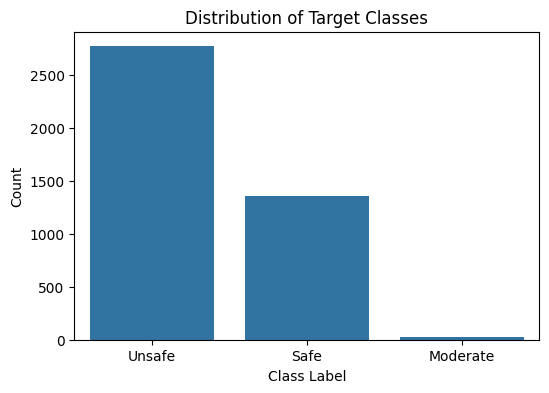

In [236]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='severity', data=df)
plt.title("Distribution of Target Classes")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


<Figure size 600x400 with 0 Axes>

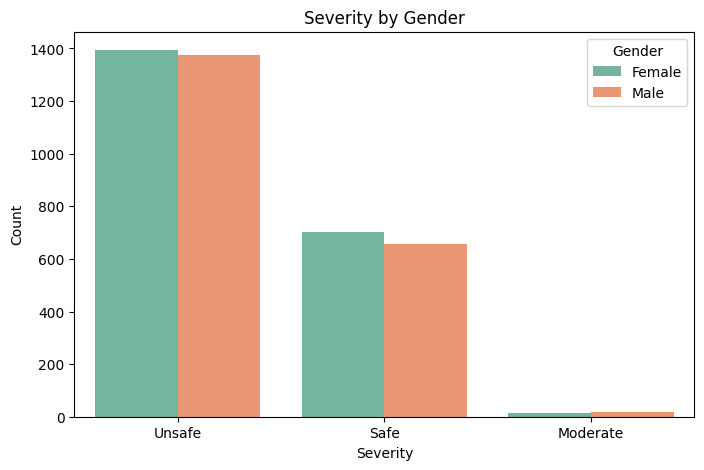

In [237]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
plt.figure(figsize=(8, 5))
sns.countplot(x='severity', hue='gender', data=df, palette='Set2')
plt.title("Severity by Gender")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

##  Data Cleaning

In this section, we will perform essential cleaning tasks to ensure data quality and consistency.  
This includes:
- Dropping duplicates
- Handling missing values
- Normalizing inconsistent entries
- Filtering irrelevant rows if applicable


In [238]:
# Viewing missing values and null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 779


In [239]:
# Replacing actual NaN values
df['special_needs_group'] = df['special_needs_group'].fillna('none')

# Also replacing string "None" values if they exist
df['special_needs_group'] = df['special_needs_group'].replace('None', 'none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

In [240]:
# Dropping duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Dropped {initial_shape[0] - df.shape[0]} duplicate rows.")
print(f'Duplicated entries : {df.duplicated().sum()}')

Dropped 393 duplicate rows.
Duplicated entries : 0


**Enriching Location Data**

To support rich geographical analysis and live visualizations, we will enhance our `geo_location` and `country` columns.

We aim to:
- Convert `geo_location` (text) into **latitude & longitude**
- Break down `country` into **county, constituency, area, and location** 
- Enable mapping tools like **Plotly**, **Folium**, or **Tableau** to interact with enriched data

In [241]:
from geopy.geocoders import Nominatim
import time
import pycountry

# Initialize geolocator
geolocator = Nominatim(user_agent="cleanwatAI_geolocator")

# Standardize country names using pycountry
def standardize_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return name

# Get lat/lon using geopy
def get_lat_lon(country_name):
    try:
        location = geolocator.geocode(country_name)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

df['country_standardized'] = df['country'].apply(standardize_country)
country_coords = df['country_standardized'].dropna().unique()
coord_map = {}

for country in country_coords:
    lat_lon = get_lat_lon(country)
    coord_map[country] = lat_lon
    time.sleep(1)

# Map coordinates back to DataFrame
df[['latitude', 'longitude']] = df['country_standardized'].map(coord_map).apply(pd.Series)


In [242]:
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [243]:
from shapely.geometry import Point

# Drop rows with missing coordinates
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create geometry column
df_clean['geometry'] = df_clean.apply(lambda r: Point(float(r['longitude']), float(r['latitude'])), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, geometry='geometry', crs="EPSG:4326")

In [244]:
gdf = gpd.sjoin(gdf, world[['geometry', 'NAME', 'CONTINENT']], how='left', predicate='within')
df['country'] = gdf['NAME']
df['continent'] = gdf['CONTINENT']

In [245]:
# admin1_path = r"C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\Admin"
# admin1 = gpd.read_file(admin1_path)

# if 'index_right' in gdf.columns:
#     gdf = gdf.drop(columns=['index_right'])

# if 'index_right' in admin1.columns:
#     admin1 = admin1.drop(columns=['index_right'])

# gdf = gpd.sjoin(gdf, admin1[['name', 'iso_a2', 'geometry']], how='left', predicate='within')

# # 2. Rename columns FIRST
# gdf = gdf.rename(columns={'name': 'admin_region', 'iso_a2': 'country_code'})

# # 3. Assign to your original DataFrame
# df['admin_region'] = gdf['admin_region']
# df['country_code'] = gdf['country_code']

In [246]:
# Define colors for each severity level
severity_colors = {
    'Unsafe': 'red',
    'Moderate': 'orange',
    'safe': 'green'
}


In [247]:
import folium
from folium.plugins import MarkerCluster

# marker color based on severity
def get_marker_color(severity):
    if severity == 'Safe':
        return 'green'
    elif severity == 'Moderate':
        return 'orange'
    elif severity == 'Unsafe':
        return 'red'
    else:
        return 'gray'

# Base map centered on mean coordinates
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3, tiles='cartodbpositron')

# Add marker cluster to group nearby points
marker_cluster = MarkerCluster().add_to(m)

# Add markers with popups and color-coded severity
for _, row in df.dropna(subset=['latitude', 'longitude', 'severity']).iterrows():
    color = get_marker_color(row['severity'])

    # Prepare popup HTML
    popup_html = f"""
    <b>Country:</b> {row['country']}<br>
    <b>Water Source:</b> {row['water_source']}<br>
    <b>Severity:</b> {row['severity']}<br>
    <b>Title:</b> {row['source_title']}
"""




    # Add CircleMarker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(marker_cluster)

# visualizethe map
m


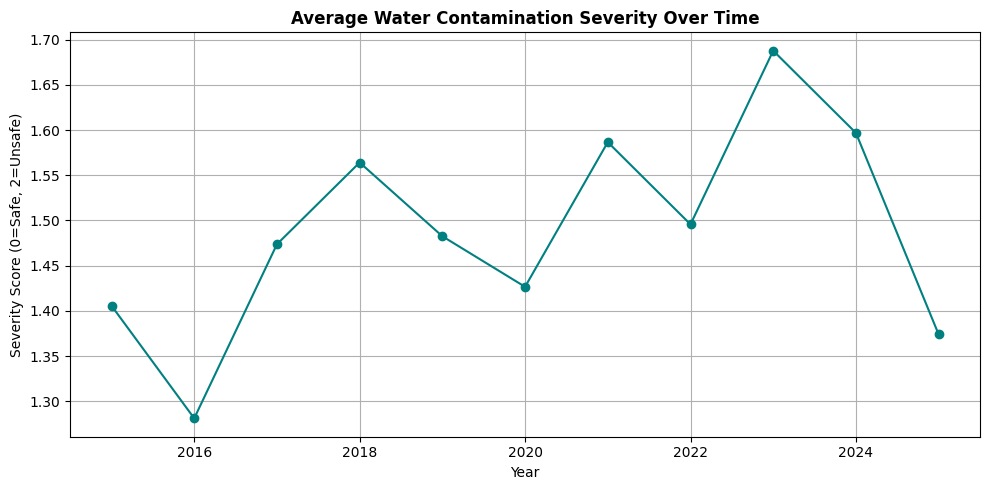

In [248]:
severity_map = {
    'Safe': 0,
    'Moderate': 1,
    'Unsafe': 2
}

# Create a numeric severity column
df['severity_score'] = df['severity'].map(severity_map)

# Now you can group and plot the mean severity
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('year')['severity_score'].mean().plot(ax=ax, color='teal', marker='o')

ax.set_title('Average Water Contamination Severity Over Time', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Severity Score (0=Safe, 2=Unsafe)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Age Group Distribution**

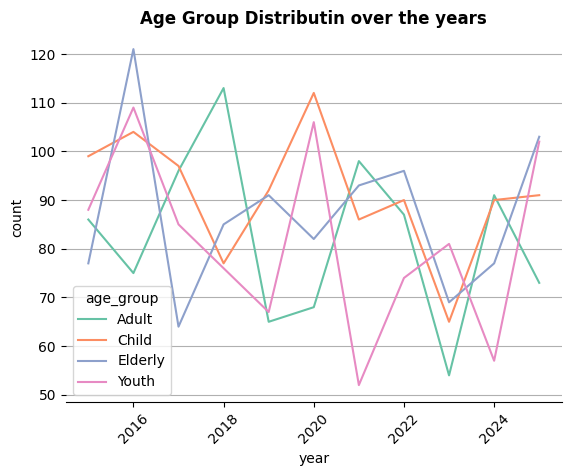

In [249]:
age_by_year = df.groupby(['year', 'age_group']).size().reset_index(name='count')

sns.lineplot(data=age_by_year, x='year', y='count', hue='age_group', palette='Set2')
plt.title('Age Group Distributin over the years', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

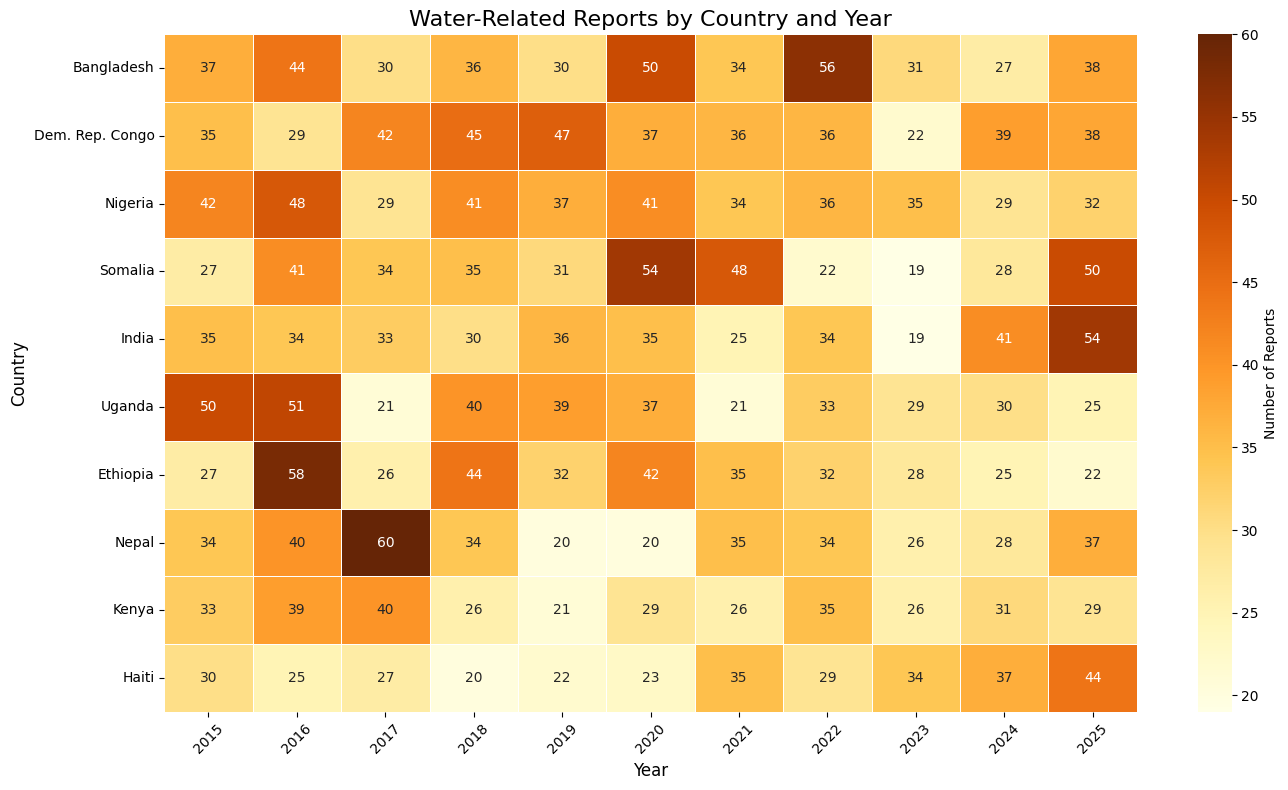

In [250]:
# Drop missing or invalid data
df_clean = df.dropna(subset=['country', 'year'])
df_clean['year'] = df_clean['year'].astype(str)

# Count reports per (country, year)
heatmap_data = df_clean.groupby(['country', 'year']).size().unstack(fill_value=0)

top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_top = heatmap_data.loc[top_countries]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_top, cmap="YlOrBr", annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Reports'})
    
plt.title("Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [251]:
severity_map = {
    'Safe': 1,
    'Moderate': 2,
    'Unsafe': 3
}
df_clean['severity_score'] = df_clean['severity'].map(severity_map)
severity_heatmap = df_clean.groupby(['country', 'year'])['severity_score'].mean().unstack()
top_countries = df_clean['country'].value_counts().head(15).index
severity_heatmap_top = severity_heatmap.loc[top_countries]


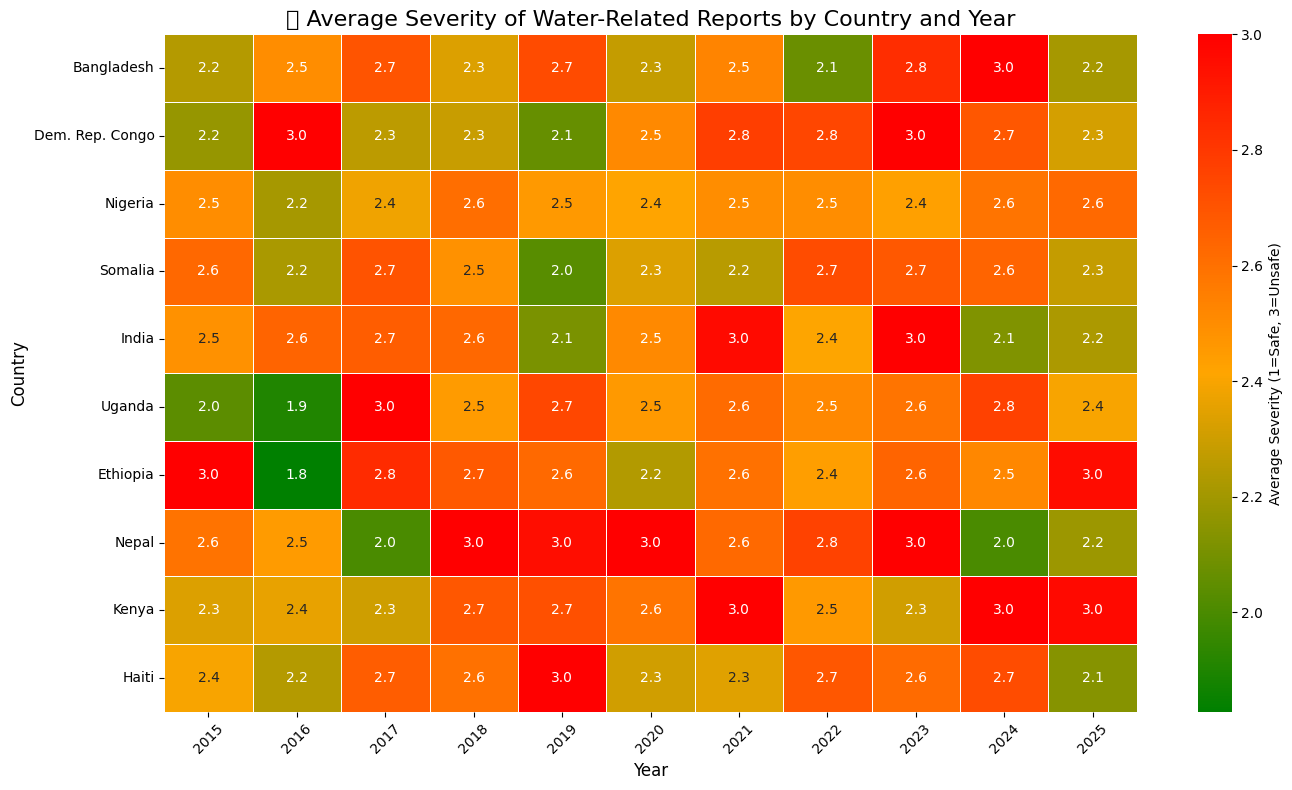

In [252]:
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: green (safe) → orange (moderate) → red (unsafe)
cmap = LinearSegmentedColormap.from_list("severity", ['green', 'orange', 'red'])

plt.figure(figsize=(14, 8))
sns.heatmap(
    severity_heatmap_top,
    cmap=cmap,
    annot=True,
    fmt='.1f',
    linewidths=.5,
    cbar_kws={'label': 'Average Severity (1=Safe, 3=Unsafe)'}
)

plt.title("🌍 Average Severity of Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Heatmap Visualizations Summary**

#### Water-Related Reports by Country and Year
This heatmap shows the **number of water-related reports** recorded across countries from **2015 to 2025**.

- **Darker shades** indicate **more reports**.
- Countries like **Nepal**, **Nigeria**, and **Ethiopia** show high reporting activity.
- Highlights trends in reporting, possibly due to increased awareness or worsening conditions in certain years.

#### Average Severity of Reports by Country and Year
This heatmap presents the **average severity score** (on a scale of **1 = Safe** to **3 = Unsafe**) for water-related reports.

- **Green** indicates **lower average severity** (safer), while **red** indicates **higher severity** (more unsafe).
- Most averages are between **2.6 and 3**, suggesting generally **moderate to high severity** levels.
- A few **green cells** (e.g., Uganda 2016, Ethiopia 2016) reflect **less severe years**, but these are rare.

These visualizations provide insight into both the **volume** and **intensity** of water-related issues over time and geography.


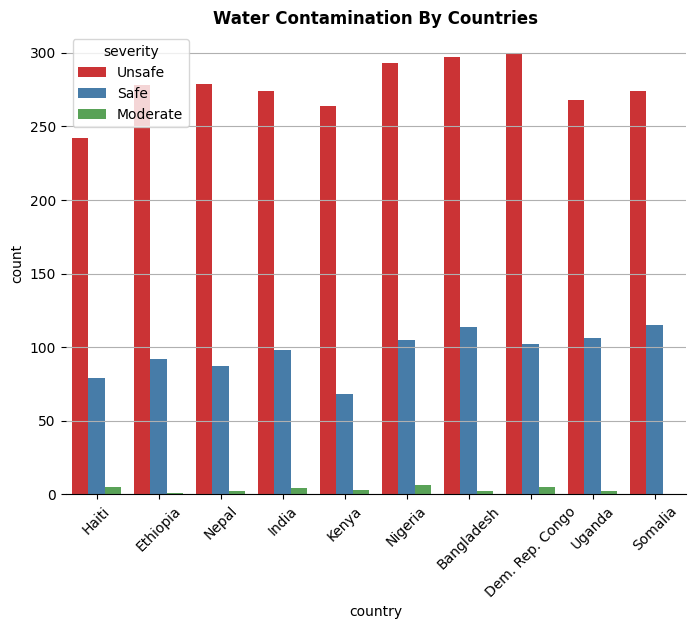

In [253]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'country', hue = 'severity', palette = 'Set1')
plt.title('Water Contamination By Countries', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

In [254]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df

source_type        Academic Paper  Field Survey  Gov Report  NGO Report
organization                                                           
Red Cross                     183           172         172         191
Save the Children             198           201         155         207
UNICEF                        184           189         170         184
WHO                           156           169         220         196
Water.org                     223           206         190         198

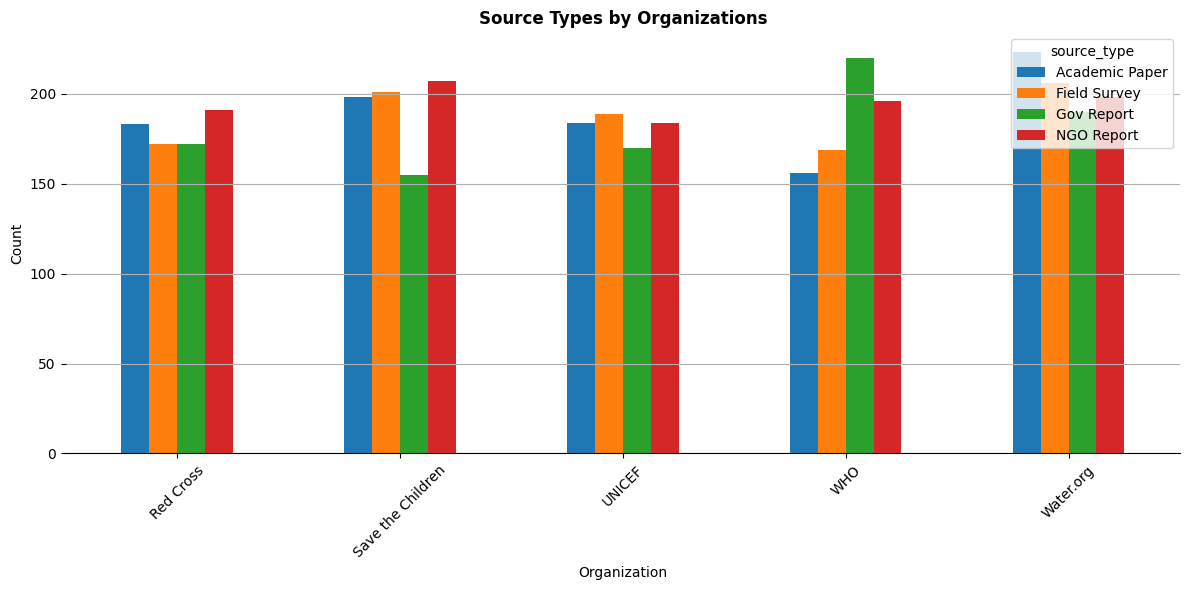

In [255]:
source_df.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Source Types by Organizations', weight='bold')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

##  Text Preprocessing (Excerpt Column)

To prepare our text data for modeling, we must standardize and clean the raw text in the `excerpt` column.  

We will:
- Convert all text to lowercase
- Remove punctuation, digits, and extra whitespace
- Remove stopwords (like "the", "is", "and")
- Tokenize the text (split into words)
- Apply lemmatization to reduce words to base form

### Preprocessing
#### Cleaning

In [256]:
import nltk
print(nltk.__version__)

nltk.download('punkt')
nltk.download('stopwords')

3.8.1


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [257]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [258]:
#cleaning + lemmatization function
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Handle negations (combine with next word if possible)
    text = re.sub(r"\b(no|not|never)\s+(\w+)", r"no_\2", text)

    # Remove punctuation except underscores (used in negation)
    text = re.sub(r"[^\w\s_]", "", text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords (except 'no_x' preserved words)
    cleaned = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if (token in stop_words and token.startswith('no_')) or (token not in stop_words and len(token) > 2)
    ]

    return " ".join(cleaned)

In [259]:
# Apply to the excerpt column
df['clean_excerpt'] = df['excerpt'].apply(clean_text)
df[['excerpt', 'clean_excerpt']].head()

excerpt  \
0  Contaminated water sources have led to increas...   
1  Field reports indicate raw sewage mixes with l...   
2  No treatment observed; water smells foul and r...   
3  Contaminated water sources have led to increas...   
4  No treatment observed; water smells foul and r...   

                                       clean_excerpt  
0  contaminated water source led increased diarrh...  
1  field report indicate raw sewage mix local wat...  
2  no_treatment observed water smell foul residen...  
3  contaminated water source led increased diarrh...  
4  no_treatment observed water smell foul residen...

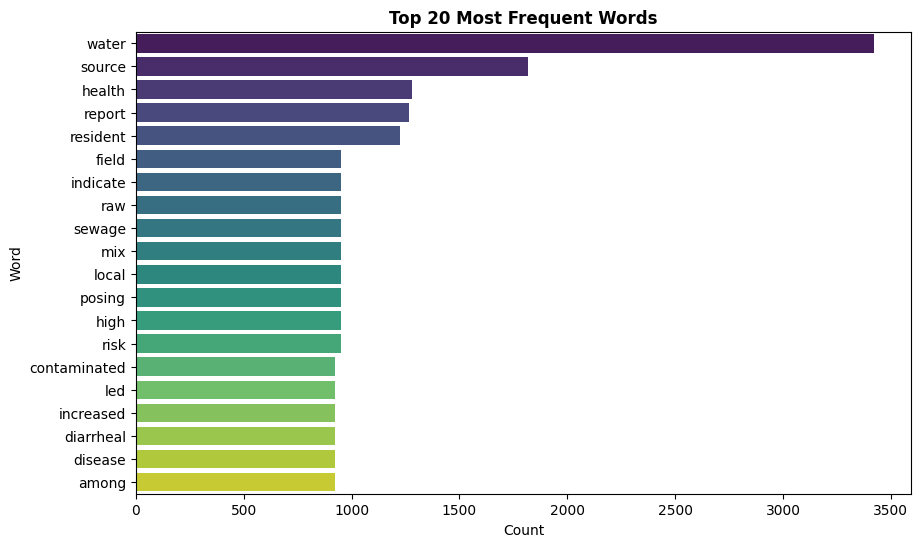

In [260]:
from collections import Counter

top_n = 20
# Combine all cleaned text into a single list of words
all_words = ' '.join(df['clean_excerpt']).split()
word_df = Counter(all_words)
common_words = word_df.most_common(20)

# Create DataFrame for plotting
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='count', y='word', hue = 'word', palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words", weight='bold')
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

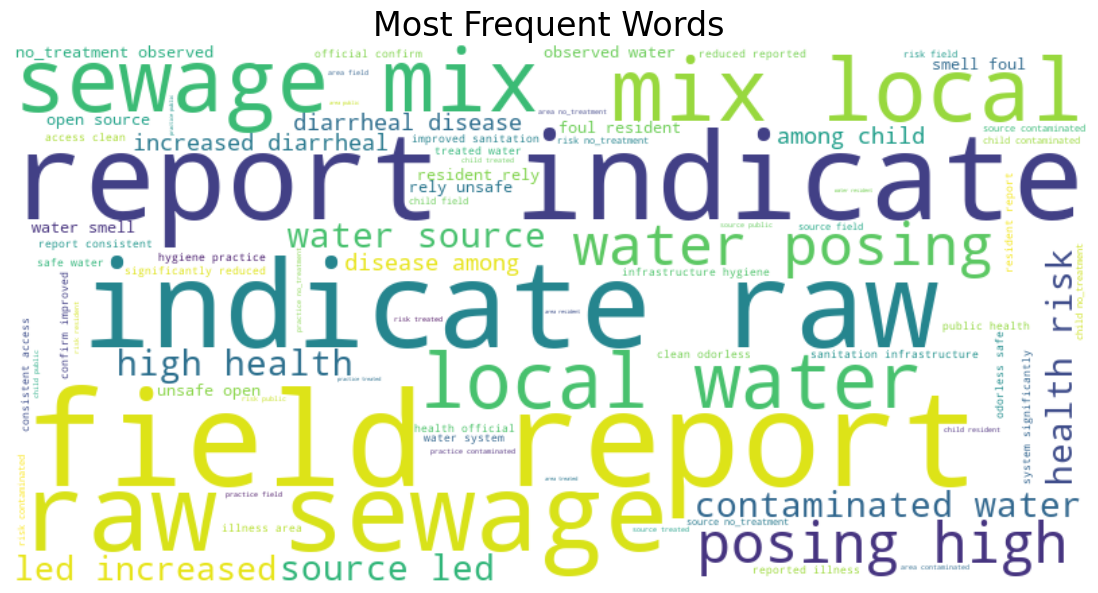

In [261]:
from wordcloud import WordCloud

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=24)
plt.show()

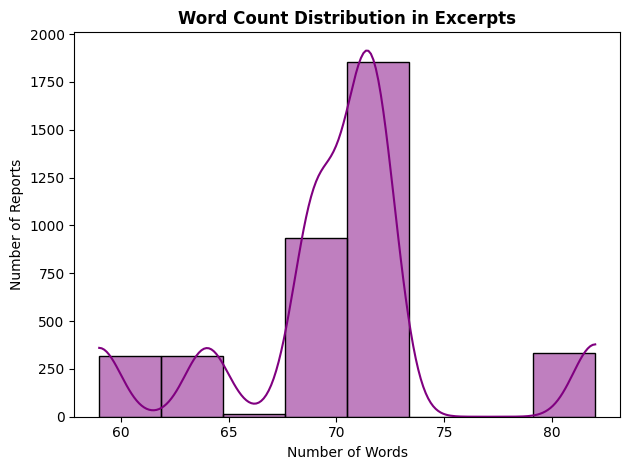

In [262]:
#word distribution Frequency
df['token_len'] = df['clean_excerpt'].apply(len)
df['token_len'].head()

#Ploting
sns.histplot(df['token_len'], bins=8, kde=True, color='purple')
plt.title('Word Count Distribution in Excerpts', weight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()


##  Feature Engineering

In this step, we convert the cleaned text and any selected structured features into a machine-readable format.

We will:
- Use **TF-IDF** to vectorize the `clean_excerpt` column.
- Select meaningful structured features for modeling.
- Combine both feature sets into a single matrix `X` for training.
- Engineer 'severity' column to have only a bimodal classification that's removing 'moderate' class to be 'unsafe'

In [263]:
df['severity'].value_counts()

severity
Unsafe      2768
Safe         966
Moderate      30
Name: count, dtype: int64

In [264]:
df['severity'] = df['severity'].apply(lambda x: 'Unsafe' if x == 'Moderate' else x)
df['severity'].value_counts()

severity
Unsafe    2798
Safe       966
Name: count, dtype: int64

**Bigrams/Trigrams Analysis**

In [265]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
bigram_vec = CountVectorizer(ngram_range=(2, 2), max_features=10)
X_bigrams = bigram_vec.fit_transform(df['clean_excerpt'])

# Top 20 bigrams
bigrams = pd.DataFrame(X_bigrams.toarray(), columns=bigram_vec.get_feature_names_out())
bigrams.sum().sort_values(ascending=False)

field report       949
health risk        949
high health        949
indicate raw       949
local water        949
mix local          949
raw sewage         949
report indicate    949
sewage mix         949
water posing       949
dtype: int64

**TF-IDF Analysis**

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vec.fit_transform(df['clean_excerpt'])

# View top TF-IDF terms
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df.sum().sort_values(ascending=False).head(10)

water           503.450322
source          456.956722
resident        350.542298
report          333.666781
led             332.128103
increased       332.128103
diarrheal       332.128103
contaminated    332.128103
disease         332.128103
child           332.128103
dtype: float64

**Word Association / Co-occurrence**

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['clean_excerpt'])
Xc = (X.T @ X)

# Convert to dataframe
co_occurrence_df = pd.DataFrame(data=Xc.toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

# View top associations for a word
co_occurrence_df['water'].sort_values(ascending=False).head(10)

water       3422
source      1819
report      1266
resident    1225
field        949
sewage       949
risk         949
raw          949
posing       949
mix          949
Name: water, dtype: int64

## Modeling

In this section, we build and evaluate machine learning models to predict unsafe water conditions based on a combination of structured and textual features.

###  Steps:
1. **Train-Test Split**: We split the combined dataset into training and testing sets (80/20), ensuring balanced target classes using stratification.
2. **Model Selection**: Start with a simple baseline model (e.g., Logistic Regression) to set a performance benchmark.
3. **Evaluation**: Assess model performance using classification metrics such as accuracy, precision, recall, and F1-score.
4. **Tuning**: Tune hyperparameters and experiment with other models like, Random Forest, XGBoost for better performance.

The integrated features help us leverage both categorical/numerical context and textual insight to improve prediction accuracy.

### **Simple Baseline Logistic Model**

In [268]:
#Library importation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, precision_score, recall_score, f1_score,
                             RocCurveDisplay, roc_auc_score, roc_curve)

In [269]:
from sklearn.utils import resample

# Encode the target variable
le = LabelEncoder()
df['severity_encoded'] = le.fit_transform(df['severity'])

# Handle class imbalance by upsampling the minority class (safe)
df_safe = df[df['severity_encoded'] == 0]
df_unsafe = df[df['severity_encoded'] == 1]

df_safe_upsampled = resample(
    df_safe,
    replace=True,
    n_samples=len(df_unsafe),
    random_state=42
)

# Combine the upsampled safe data with the unsafe data
df_balanced = pd.concat([df_unsafe, df_safe_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

#define X and y
X = df_balanced['clean_excerpt']
y = df_balanced['severity_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.95,
    stop_words='english',
    lowercase=True
)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Initialize and train the model
simp_model = LogisticRegression(max_iter=1000, random_state=42, class_weight = 'balanced')
simp_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [270]:
# Make predictions then evaluate model
y_preds = simp_model.predict(X_test)
y_probs = simp_model.predict_proba(X_test)[:, 1]

#Evaluate the model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds)}')
print(f'precision Score : {precision_score(y_test, y_preds)}')
print(f'Recall Score : {recall_score(y_test, y_preds)}')
print(f'F1 Score = {f1_score(y_test, y_preds)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

Accuracy Score : 1.0
precision Score : 1.0
Recall Score : 1.0
F1 Score = 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       560

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120


ROC_AUC Score : 1.0


array([[560,   0],
       [  0, 560]], dtype=int64)

In [271]:
print("Confusion matrix shape:", cm.shape)
print("Label encoder classes:", le.classes_)


Confusion matrix shape: (2, 2)
Label encoder classes: ['Safe' 'Unsafe']


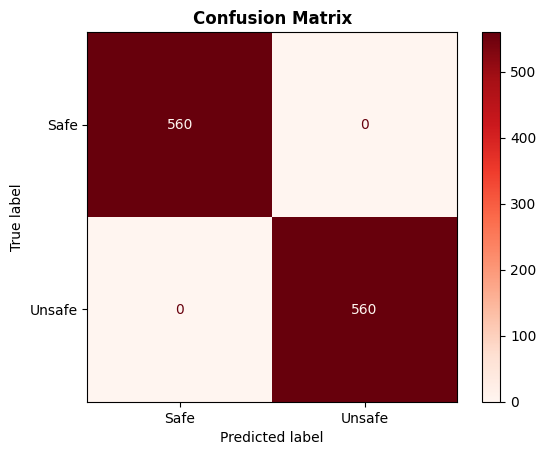

In [272]:
# Ploting our model performance
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = le.classes_)
disp.plot(cmap = 'Reds')
plt.title('Confusion Matrix', weight = 'bold')
plt.show()

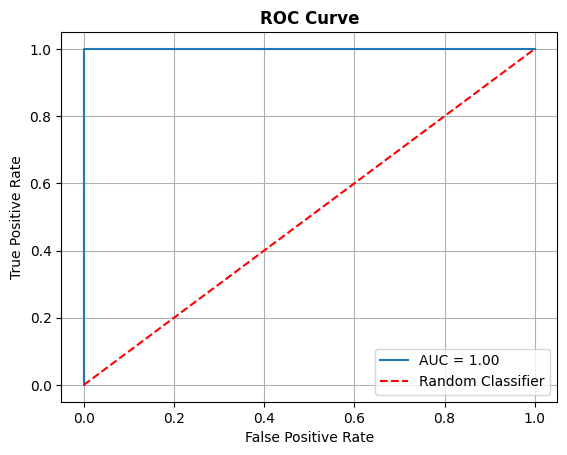

In [273]:
# Roc Curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

### **NLP RandomForest**

In [274]:
# Library importation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [275]:
# initialize the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# initialize GridSearchCV
GridSearchCV_model = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                                  scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)
# Fit the model
GridSearchCV_model.fit(X_train, y_train)

# Best parameters
best_params = GridSearchCV_model.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [276]:
# Make predictions with the best model
best_rf_model = GridSearchCV_model.best_estimator_
y_preds_rf = best_rf_model.predict(X_test)
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds_rf)}')
print(f'precision Score : {precision_score(y_test, y_preds_rf)}')
print(f'Recall Score : {recall_score(y_test, y_preds_rf)}')
print(f'F1 Score = {f1_score(y_test, y_preds_rf)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds_rf)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs_rf)}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_preds_rf)
cm_rf

Accuracy Score : 1.0
precision Score : 1.0
Recall Score : 1.0
F1 Score = 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       560

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120


ROC_AUC Score : 1.0


array([[560,   0],
       [  0, 560]], dtype=int64)

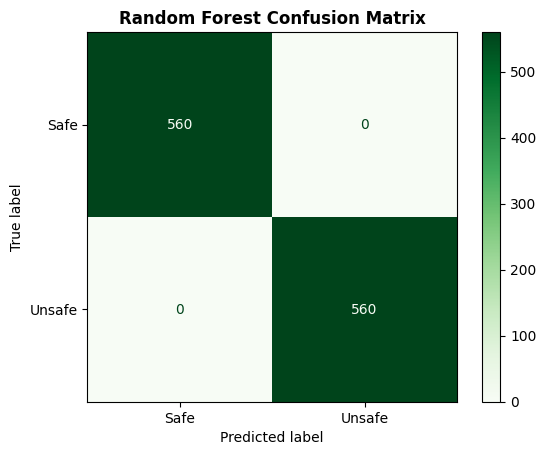

In [277]:
# Ploting our model performance
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = le.classes_)
disp.plot(cmap = 'Greens')
plt.title('Random Forest Confusion Matrix', weight = 'bold')
plt.show()

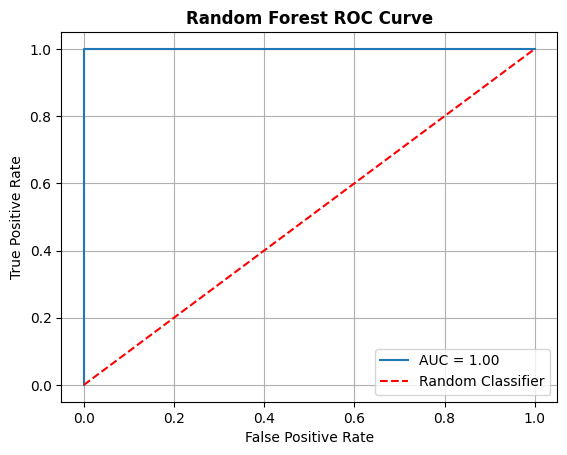

In [278]:
# Roc Curve plot
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = roc_auc_score(y_test, y_probs_rf)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('Random Forest ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

### ***Improving and Optimizing the RandomForestClassifer**

In [279]:
# Finding the best model
rf_model2 = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

# Increase the range of hyperparameters to find the best performig model
param_grid2 = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
GridSearchCV_model2 = GridSearchCV(estimator=rf_model2, param_grid=param_grid2,
                                   scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)

# fit grid search
GridSearchCV_model2.fit(X_train, y_train)

# Find best parameters
best_params2 = GridSearchCV_model2.best_params_
print(f'Best Parameters (Extended Search): {best_params2}')

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters (Extended Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [280]:
# Make predictions with the best model
best_model = GridSearchCV_model2.best_estimator_
y_preds_rf2 = best_model.predict(X_test)
y_probs_rf2 = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds_rf2)}')
print(f'precision Score : {precision_score(y_test, y_preds_rf2)}')
print(f'Recall Score : {recall_score(y_test, y_preds_rf2)}')
print(f'F1 Score = {f1_score(y_test, y_preds_rf2)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds_rf2)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs_rf2)}')

# Confusion Matrix
best_rf_cm = confusion_matrix(y_test, y_preds_rf2)
best_rf_cm

Accuracy Score : 1.0
precision Score : 1.0
Recall Score : 1.0
F1 Score = 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       560

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120


ROC_AUC Score : 1.0


array([[560,   0],
       [  0, 560]], dtype=int64)

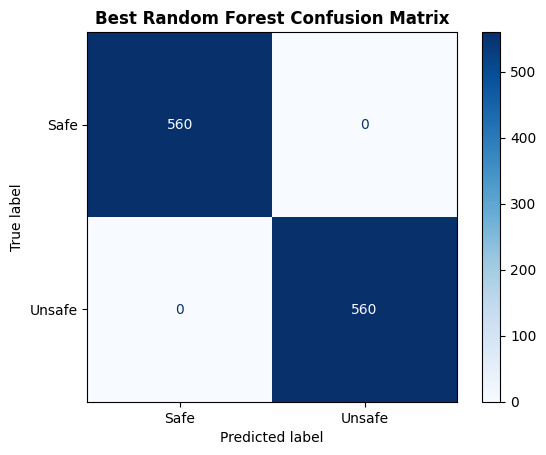

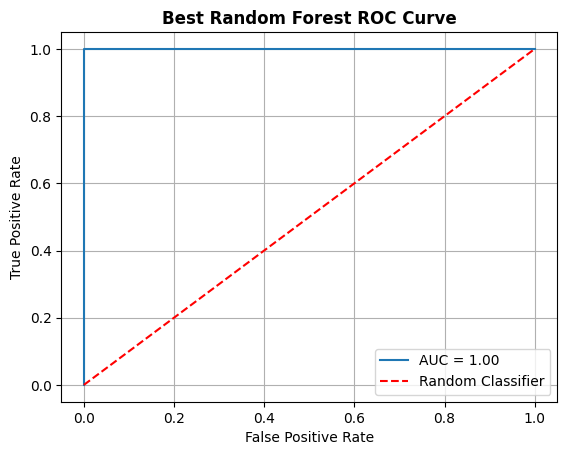

In [281]:
# Ploting Best model Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = best_rf_cm, display_labels = le.classes_)
disp.plot(cmap = 'Blues')
plt.title('Best Random Forest Confusion Matrix', weight = 'bold')
plt.show()

# Roc Curve plot for the best model
fpr_best_rf, tpr_best_rf, thresholds = roc_curve(y_test, y_probs_rf2)
roc_auc_best_rf = roc_auc_score(y_test, y_probs_rf2)
RocCurveDisplay(fpr=fpr_best_rf, tpr=tpr_best_rf, roc_auc=roc_auc_best_rf).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('Best Random Forest ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

## Building a Pipeline

Accuracy Score : 1.0
precision Score : 1.0
Recall Score : 1.0
F1 Score = 1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       560

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120


ROC_AUC Score : 1.0


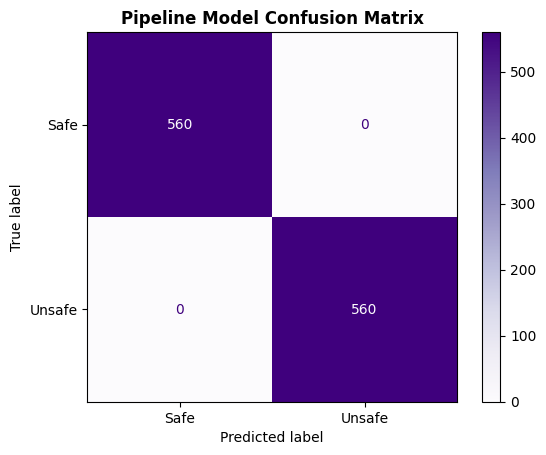

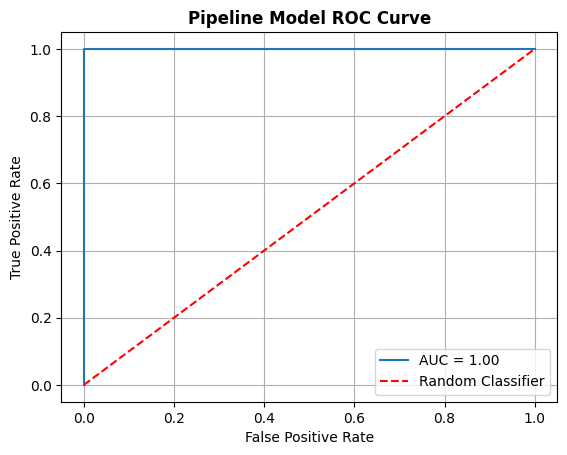

In [282]:
# Library importation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

#define x and y for the pipeline
X = df_balanced['clean_excerpt']
y = df_balanced['severity_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a custom cleaning function for the pipeline
# Vectorized wrapper
def clean_texts(texts):
    return [clean_text(text) for text in texts]

cleaner = FunctionTransformer(clean_texts, validate=False)

# Create pipelne with Random Forest classifier, TF-IDF vectorization and a custom cleaning function
pipeline = Pipeline([
    ('cleaner', FunctionTransformer(clean_texts, validate=False)),
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=1,
        max_df=0.95,
        stop_words='english',
    )),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

# Make predictions with the pipeline
y_preds_pipeline = pipeline.predict(X_test)
y_probs_pipeline = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the pipeline model
print(f'Accuracy Score : {accuracy_score(y_test, y_preds_pipeline)}')
print(f'precision Score : {precision_score(y_test, y_preds_pipeline)}')
print(f'Recall Score : {recall_score(y_test, y_preds_pipeline)}')
print(f'F1 Score = {f1_score(y_test, y_preds_pipeline)}')
print(f'Classification Report : \n{classification_report(y_test, y_preds_pipeline)}\n')
print(f'ROC_AUC Score : {roc_auc_score(y_test, y_probs_pipeline)}')

# Confusion Matrix for the pipeline model
pipeline_cm = confusion_matrix(y_test, y_preds_pipeline)

# Ploting Pipeline model Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=pipeline_cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title('Pipeline Model Confusion Matrix', weight='bold')
plt.show()

# Roc Curve plot for the pipeline model
fpr_pipeline, tpr_pipeline, thresholds = roc_curve(y_test, y_probs_pipeline)
roc_auc_pipeline = roc_auc_score(y_test, y_probs_pipeline)
RocCurveDisplay(fpr=fpr_pipeline, tpr=tpr_pipeline, roc_auc=roc_auc_pipeline).plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.title('Pipeline Model ROC Curve', weight='bold')
plt.grid()
plt.legend()
plt.show()

# Saving The Pipeline

In [283]:
# Library importation
import joblib

# Save the pipeline
joblib.dump(pipeline, '../app/models/nlp_pipeline.pkl')

['../app/models/nlp_pipeline.pkl']

### Pipeline testing

In [284]:
safe_description = "The water is clear with no visible particles or discoloration. It has no smell and comes from a protected borehole. There has been no recent rainfall, and no industrial or animal activity is nearby. The surrounding infrastructure is intact and well maintained, ensuring safe and reliable water access."

unsafe_description = "Water appears cloudy with a brownish tint and emits a foul sewage-like odor. It’s sourced from an open stream near agricultural activity and recent heavy rains. Livestock are seen nearby, and the area lacks proper drainage. The infrastructure is damaged, increasing the risk of contamination and waterborne diseases."

print("Safe description prediction:", pipeline.predict([safe_description]))
print("Unsafe description prediction:", pipeline.predict([unsafe_description]))

Safe description prediction: [0]
Unsafe description prediction: [1]
